In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
mylist = ['a','b','c']
mynums = [1,2,3]
for num, char in zip(mynums, mylist):
    print(char, num)

a 1
b 2
c 3


In [18]:
#from fitters.Gaussian import dip, double_dip, bump, bump2, bump3, bump2r, gaussian
from fitters.Gaussian import gaussian_2d

In [73]:
def getPhotonNumber(mean):
    # todo! make this shot noise (poisson) instead of randint noise
    return mean + mean*np.random.randint(0,5)

In [74]:
def applyEmGain(electronsIn, gain):
    # todo! make this sammple from em gain electron distributions
    return electronsIn*gain

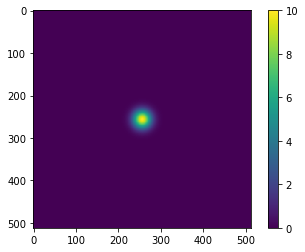

In [44]:
xp = yp = np.arange(512)
XX, YY = np.meshgrid(xp,yp)
psi2d = gaussian_2d.f_noravel((XX,YY), 10, 256, 256, 15, 15, 0, 0)
plt.imshow(psi2d)
plt.colorbar()

In [81]:
def getBlur(row,col):
    return 5

In [ ]:
photonImage = np.zeros((512,512))
image = np.zeros((512,512))
#image += psi2d
readoutnoiseMagnitude = 0
QE = 0.9
emGainSetting = 1000

# determine how many electrons are on a pixel
for rowi, row in enumerate(image):
    for coli, col in enumerate(row):
        # determine if photon
        meanIntensity = psi2d[rowi,coli]
        numPhotonsFromLocationInImage = getPhotonNumber(meanIntensity)
        blurAmount = getBlur(rowi,coli)
        photonImage += gaussian_2d.f_noravel((XX,YY), rowi, coli, blurAmount, blurAmount, 0, 0, 0)
        

# apply noise       
for rowi, row in enumerate(image):
    for coli, col in enumerate(row):
        numPhotons = photonImage[rowi,coli]
        numelectons = numPhotons * QE
        numberElectronsReadout = applyEmGain(numelectons, emGainSetting)
        image[rowi,coli] += numberElectronsReadout

        if readoutnoiseMagnitude != 0:
            image[rowi,coli] += np.random.randint(readoutnoiseMagnitude)

In [ ]:
print('hi')

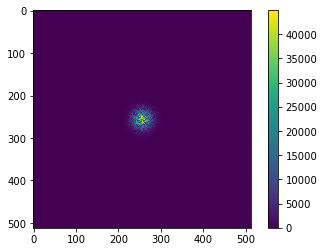

In [79]:
plt.imshow(image)
plt.colorbar()